In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
# plt.rcParams['font.sans-serif'] = ['SimSun']  # 或 ['Microsoft YaHei']

In [24]:
#pic
img1 = Image.open("origin_images/222.png").convert('L')
array = np.load('anti_mean.npy')
image1 = np.clip(img1 / array,0,255)
image1 = image1.astype(np.uint8)
#back
img2 = Image.open("back_images/without2to222.png").convert('L')

In [25]:
print(img2.size)
# 将图像转换为NumPy数组（浮点数类型）
image1 = np.array(img1, dtype=np.float64)
image2 = np.array(img2, dtype=np.float64)
result_image = image1 - image2
print(result_image.shape)
print(image2.shape)

(4024, 3036)
(3036, 4024)
(3036, 4024)


In [26]:
# img = Image.fromarray(result_image)
# plt.imshow(result_image, cmap="gray")

In [27]:
# # 打开图像文件
# image = image1
# # 获取图像的宽度和高度
# width, height = image.shape
# row_number = 1518
# row_data = image[row_number,:]
# # 创建柱状图
# plt.subplot(211)
# plt.bar(range(len(row_data)), row_data, width=1.0)

# plt.title(f'Row {row_number}')
# plt.xlabel('Column Index')
# plt.ylabel('Value')
# # 显示图形
# plt.show()
# plt.subplot(212)
# # 打开图像文件
# image = image2
# # 获取图像的宽度和高度
# width, height = image.shape
# row_number = 1518
# row_data = image[row_number,: ]
# plt.bar(range(len(row_data)), row_data, width=1.0)

# plt.title(f'Row {row_number}')
# plt.xlabel('Column Index')
# plt.ylabel('Value')
# # 显示图形
# plt.show()

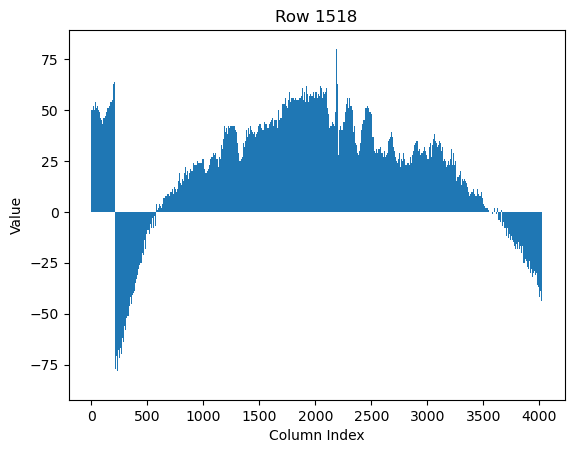

In [28]:
# 打开图像文件
image = result_image
# 获取图像的宽度和高度
width, height = image.shape
row_number = 1518
row_data = image[row_number, :]
plt.bar(range(len(row_data)), row_data, width=1.0)

plt.title(f'Row {row_number}')
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()

In [29]:
# np.save('1-2.npy', result_image)
# print(row_data.shape)
# for element in row_data:
#     print(element)

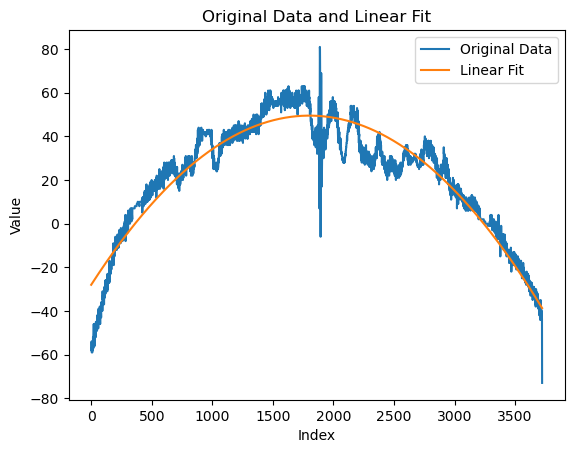

In [30]:
# 创建示例数组
original_array = row_data

# 取数组的208位之后的元素，创建新数组
new_array = original_array[300:]

# 进行线性拟合
degree = 2
coefficients = np.polyfit(np.arange(len(new_array)), new_array, degree)

# 使用polyval函数生成拟合曲线
polynomial_fit = np.polyval(coefficients, np.arange(len(new_array)))


# 计算每个位置的值与拟合线性函数的差异
difference = new_array - polynomial_fit

# 绘制原始数据和拟合线性函数
plt.plot(np.arange(len(new_array)), new_array, label='Original Data')
plt.plot(np.arange(len(new_array)), polynomial_fit, label='Linear Fit')
plt.legend()
plt.title('Original Data and Linear Fit')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


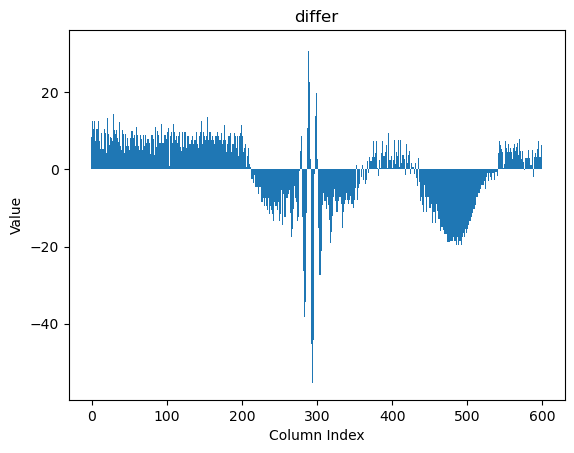

In [31]:
selected_difference = difference[1600:2200]
plt.bar(range(len(selected_difference)), selected_difference, width=1.0)

plt.title("differ")
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()

In [32]:
# 设置打印选项，使其打印所有元素
np.set_printoptions(threshold=np.inf)
# 打印数组
print(selected_difference)

[  8.45684186  12.44723777   9.43768146  10.42817294  12.4187122
   7.40929923   7.39993405  10.39061666  10.38134704  12.37212521
  10.36295116   7.35382488   5.3447464    9.33571569   6.32673276
   5.31779762   5.30891026  10.30007068  11.29127888   9.28253487
   4.27383864  13.26519018  10.25658951   9.24803663   6.23953152
   8.23107419   8.22266465   8.21430289   7.20598891  14.19772272
   9.1895043   10.18133367   9.17321082  10.16513575   8.15710846
   7.14912895   7.14119723  12.13331329   6.12547713   5.11768875
   5.10994815  10.10225534   9.0946103    8.08701305   4.07946358
   9.0719619    6.06450799   8.05710187   8.04974353   6.04243297
   5.03517019   9.02795519   8.02078798  10.01366854  10.00659689
   7.99957303   7.99259694   8.98566863   5.97878811   9.97195537
  10.96517041   8.95843323   5.95174384   5.94510222   4.93850839
   8.93196234   7.92546407   7.91901358   4.91261088   8.90625596
   5.89994882   4.89368946   8.88747788   6.88131408   7.87519807
   7.869129